In [1]:
# import utils
import pandas as pd
import nltk
import numpy as np
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hag75415\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Data from Data collection. Reduced to approximately 5000.
result = pd.read_csv("Result 1 (1).csv", encoding = "ISO-8859-1")

In [3]:
#Count number of Data. Identifying the Standard Deviation for thresholds when labeling data
result.iloc[10::].describe()

,Unnamed: 0,Date Close Price (n),Next Day Close Price (n+1),Difference in Price (n+1) - (n),Percentage of Difference to Close Price,Label
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,4904.765650,188.502478,188.432214,-0.070263,-0.000469,NaN
std,2730.980833,24.653609,25.377570,5.080887,0.028792,NaN
min,72.000000,142.190000,142.190000,-15.730000,-0.099607,NaN
25%,2324.750000,170.950000,169.100000,-3.300000,-0.018939,NaN
50%,4700.500000,188.470000,190.150000,-0.060000,-0.000300,NaN
75%,7440.250000,205.210000,205.210000,3.490000,0.019063,NaN
max,9237.000000,259.430000,260.140000,10.570000,0.070422,NaN


In [4]:
#Label Buy, Sell,or Do not Move
result['Label'] = result['Label'].astype('str')

for index, row in result[11::].iterrows():
#     difference = row['difference']
    difference = row['Difference in Price (n+1) - (n)']
    constant = 0
    threshold = 0.02*row['Date Close Price (n)']+constant
    if difference >= threshold:
        label = 'Buy'
    elif difference <= (threshold)*(-1):
        label = 'Sell'
    else:
        label = "Don't move"
    result.at[index, 'Label'] = label

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hag75415\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#Tokenize, Remove Stop Words, Lemmatize, and change to Lowercase text
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

removed_stopwords = ['above',
'after',
'against',
'again',
'aren\'t',
'before',
'couldn\'t',
'below',
'did',
'didn',
'didn\'t',
'does',
'doesn',
'doesn\'t',
'don\'t',
'down',
'had',
'hadn',
'hadn\'t',
'has',
'hasn',
'hasn\'t',
'have',
'haven',
'haven\'t',
'is',
'isn',
'isn\'t',
'more',
'no',
'not',
'over',
'out',
'off',
'should',
'shouldn',
'shouldn\'t',
'under',
'up',
'was',
'wasn',
'wasn\'t',
'were',
'weren',
'weren\'t',
'will',
'won\'t',
'wouldn',
'wouldn\'t']

#Removing words of choice (above) from the Stopwords collection
# for i in removed_stopwords:
#     if i in stopwords:
#         stopwords.remove(i)
        
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# for index, row in result[0::].iterrows():
#     headline = row['title']
#     headline_tokens = headline.split()
#     clean_headline = []
#     for word in headline_tokens:
#         if not word in stopwords:
#             word = lemmatizer.lemmatize(word)
#             clean_headline.append(word.lower())
        
#     result.at[index, 'title'] = clean_headline
#     print = clean_headline

#result.to_csv('Result 6.csv')



In [7]:
import re

def func(x, csv_list):
    x_split = x.split(' ')
    x_clean_split = [lemmatizer.lemmatize(word).lower() for word in x_split if word not in stopwords]
    flagged_words = [word for word in x_clean_split if "".join(c for c in word if c not in ('!','.',':',';')) in csv_list]
    return len(flagged_words) 

#Normalizong
def normalizer(x):
    total_words = len(x['summary'].split(' '))
    comp_words = x['Content Yield']
    factor_threshold = 100
    norm_yield = (comp_words/total_words)*factor_threshold
    return norm_yield

In [8]:
key_list = pd.read_csv(r'C:\Users\hag75415\Desktop\Uni Winter 2020\Project\Dictionary words.csv')
key_list = key_list.replace(r'^\s*$', np.nan, regex = True)
key_list = key_list.dropna()
key_list = list(key_list.Words.values)
key_list = [lemmatizer.lemmatize(word).lower() for word in key_list]

Specialized_list = pd.read_csv(r'C:\Users\hag75415\Desktop\Uni Winter 2020\Project\Competitor.csv')
Specialized_list = Specialized_list.replace(r'^\s*$', np.nan, regex = True)
Specialized_list = Specialized_list.dropna()
Specialized_list = list(Specialized_list.Words.values)
Specialized_list = [lemmatizer.lemmatize(word).lower() for word in Specialized_list]


result['Specialized Yield'] = result['summary'].transform(lambda x: func(x, Specialized_list))
result['General Yield'] = result['summary'].transform(lambda x: func(x, key_list))
result['Summary Length'] = result['summary'].transform(lambda x: len(x.split(' ')))
result['Content Yield'] = (result['Specialized Yield']*2) + result['General Yield']
result['Weighted Impact Factor'] = result.apply(lambda x: normalizer(x), axis = 1)
pd.set_option("display.min_rows", 500)
display(result)

,Unnamed: 0,url,title,date,summary,Dates,Date Close Price (n),Next Day Close Price (n+1),Difference in Price (n+1) - (n),Percentage of Difference to Close Price,Label,Specialized Yield,General Yield,Summary Length,Content Yield,Weighted Impact Factor
0,25,https://finance.yahoo.com/m/9588b184-2343-3709...,Do You Own Millennials' New Favorite Stock?,2019-11-12,Millennial investors favor a certain type of s...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,1,3,24,5,20.833333
1,26,https://finance.yahoo.com/news/market-morning-...,"Market Morning: Alibabaâs Billions, Boeingâ...",2019-11-12,Alibaba Rakes In 38 Billion Singles Itâs the...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,0,4,74,4,5.405405
2,27,https://finance.yahoo.com/news/apple-card-sex-...,Apple Cardâs Gender-Bias ClaimsÂ LookÂ Famil...,2019-11-12,(Bloomberg) -- Apple Inc. pitches its new card...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,6,14,980,26,2.653061
3,28,https://www.yahoo.com/entertainment/apple-rele...,"Apple to release AR headset by 2022, Amazon to...",2019-11-12,Today's major tech headlines include a report ...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,1,0,36,2,5.555556
4,29,https://finance.yahoo.com/news/ignoring-women-...,Ignoring Women Costs Finance Firms $700 Billio...,2019-11-12,(Bloomberg) -- The male-dominated finance indu...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,3,13,306,19,6.209150
5,30,https://finance.yahoo.com/news/tiktok-revamps-...,TikTok Revamps Lobbying as Washington Targets ...,2019-11-12,"(Bloomberg) -- TikTok, the popular music-video...",2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,1,10,902,12,1.330377
6,31,https://finance.yahoo.com/news/buy-walmart-sto...,Buy Walmart Stock Ahead of Q3 Earnings with WM...,2019-11-12,Walmart stock is up over 13% in the last three...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,0,4,40,4,10.000000
7,32,https://finance.yahoo.com/m/2bbfa5e6-0910-39d0...,Analyst says Facebook Pay will dominate compet...,2019-11-11,"âItâs going to be very dramatic,â IT-Har...",2019-11-11,262.2000,262.2799,0.0799,0.000305,nan,0,4,45,4,8.888889
8,42,https://finance.yahoo.com/m/24017c9f-6623-3c3f...,Apple Inc. -- Moody's announces completion of ...,2019-11-11,Announcement of Periodic Review: Moody's annou...,2019-11-11,262.2000,262.2799,0.0799,0.000305,nan,2,2,90,6,6.666667
9,71,https://finance.yahoo.com/m/060a1a3a-82e0-3366...,Why HPâs printers are a lesson for todayâs...,2019-11-07,HPâs invention of the personal laser printer...,2019-11-07,259.4300,260.1400,0.7100,0.002737,nan,2,3,99,7,7.070707


In [9]:
#Showing the result of the news 
#Specialized Yield=0
result['summary'][1]

"Alibaba Rakes In 38 Billion Singles Itâ\x80\x99s the 11th year for the single biggest 11-11 singles day singled out to take place in a single day, though no discrimination against non singles intended. Alibaba (NYSE:BABA) has surpassed the $38 billion mark in sales during its iconic Singles Day, which may not be as impressive as [â\x80¦]The post Market Morning: Alibaba's Billions, Boeing's Reprieve, Colorado Cannabis Records, Hong Kong Bleeds appeared first on Market Exclusive."

In [10]:
Result2 = result[~(result['Specialized Yield'] == 0)]
pd.set_option("display.min_rows", 500)
display(Result2)

,Unnamed: 0,url,title,date,summary,Dates,Date Close Price (n),Next Day Close Price (n+1),Difference in Price (n+1) - (n),Percentage of Difference to Close Price,Label,Specialized Yield,General Yield,Summary Length,Content Yield,Weighted Impact Factor
0,25,https://finance.yahoo.com/m/9588b184-2343-3709...,Do You Own Millennials' New Favorite Stock?,2019-11-12,Millennial investors favor a certain type of s...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,1,3,24,5,20.833333
2,27,https://finance.yahoo.com/news/apple-card-sex-...,Apple Cardâs Gender-Bias ClaimsÂ LookÂ Famil...,2019-11-12,(Bloomberg) -- Apple Inc. pitches its new card...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,6,14,980,26,2.653061
3,28,https://www.yahoo.com/entertainment/apple-rele...,"Apple to release AR headset by 2022, Amazon to...",2019-11-12,Today's major tech headlines include a report ...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,1,0,36,2,5.555556
4,29,https://finance.yahoo.com/news/ignoring-women-...,Ignoring Women Costs Finance Firms $700 Billio...,2019-11-12,(Bloomberg) -- The male-dominated finance indu...,2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,3,13,306,19,6.209150
5,30,https://finance.yahoo.com/news/tiktok-revamps-...,TikTok Revamps Lobbying as Washington Targets ...,2019-11-12,"(Bloomberg) -- TikTok, the popular music-video...",2019-11-12,262.2799,0.0000,-262.2799,-1.000000,nan,1,10,902,12,1.330377
8,42,https://finance.yahoo.com/m/24017c9f-6623-3c3f...,Apple Inc. -- Moody's announces completion of ...,2019-11-11,Announcement of Periodic Review: Moody's annou...,2019-11-11,262.2000,262.2799,0.0799,0.000305,nan,2,2,90,6,6.666667
9,71,https://finance.yahoo.com/m/060a1a3a-82e0-3366...,Why HPâs printers are a lesson for todayâs...,2019-11-07,HPâs invention of the personal laser printer...,2019-11-07,259.4300,260.1400,0.7100,0.002737,nan,2,3,99,7,7.070707
10,72,https://finance.yahoo.com/news/adobe-exec-defe...,Adobe Exec Defends Photoshop for iPad After Ap...,2019-11-07,(Bloomberg) -- Adobe Inc. debuted its most imp...,2019-11-07,259.4300,260.1400,0.7100,0.002737,nan,5,16,405,26,6.419753
14,76,https://finance.yahoo.com/m/7c66194e-24f9-3ffe...,Apple Stock Is Hitting Record Highs; But Is It...,2019-11-07,Apple stock has a $1 trillion market cap and a...,2019-11-07,259.4300,260.1400,0.7100,0.002737,Don't move,2,5,30,9,30.000000
17,89,https://finance.yahoo.com/m/87dfa332-2b7f-32fc...,Sonos could be the next hardware acquisition a...,2019-11-06,D.A. Davidson analyst Tom Forte said Wednesday...,2019-11-06,257.2400,259.4300,2.1900,0.008513,Don't move,2,9,211,13,6.161137


In [ ]:
#Showing the result of the news 
Result2['summary'][2]

In [12]:
display(len(Result2))

2454

In [13]:
# result3 = Result2[Result2['Content Yield Norm'] >= 4]
result3 = Result2
pd.set_option("display.min_rows", 500)
result3.to_csv('Result 6.csv')

In [ ]:
# #Selecting a threshhold
# display(len(Result2))
# # result3 = Result2[Result2['Content Yield Norm'] >= 4]
# result3 = Result2
# # display(len(result3))
# pd.set_option("display.min_rows", 500)
# # display(result3)
# result3.to_csv('Result 6.csv')

In [14]:
#Count number of Data in each label category
result3.groupby("Label").count()

,Unnamed: 0,url,title,date,summary,Dates,Date Close Price (n),Next Day Close Price (n+1),Difference in Price (n+1) - (n),Percentage of Difference to Close Price,Specialized Yield,General Yield,Summary Length,Content Yield,Weighted Impact Factor
Label,,,,,,,,,,,,,,,
Buy,515,515,515,515,515,515,515,515,515,515,515,515,515,515,515
Don't move,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465,1465
Sell,466,466,466,466,466,466,466,466,466,466,466,466,466,466,466
nan,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


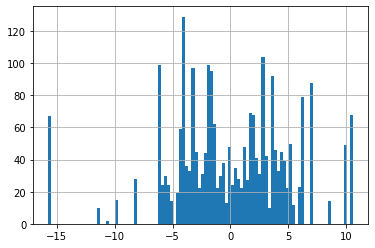

In [17]:
result3['Difference in Price (n+1) - (n)'].iloc[10::].hist( bins=100)

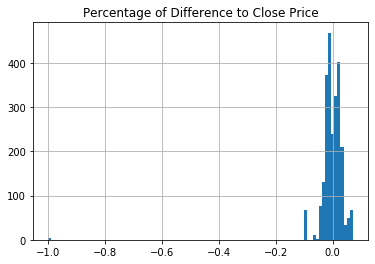

In [16]:
import matplotlib.pyplot as plt
#Plot the histgram for "Percentage of Difference to Close Price".
result3.hist(column='Percentage of Difference to Close Price', bins=100)
plt.show()

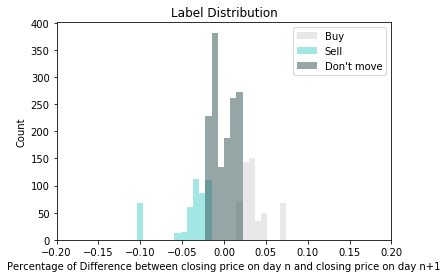

In [18]:
#Plot Label Distribution
bins_id = np.linspace(-0.2,0.2,55)
# Create 3 variables for each label
x1 = result3.loc[result3.Label=='Buy', 'Percentage of Difference to Close Price']
x2 = result3.loc[result3.Label=='Sell', 'Percentage of Difference to Close Price']
x3 = result3.loc[result3.Label=="Don't move", 'Percentage of Difference to Close Price']

kwargs = dict(alpha=0.5)

plt.hist(x1, **kwargs, color = 'lightgrey', label = 'Buy', bins=bins_id)
plt.hist(x2, **kwargs, color = 'mediumturquoise', label = 'Sell', bins=bins_id)
plt.hist(x3, **kwargs, color = 'darkslategrey', label = "Don't move", bins=bins_id)

plt.gca().set(title="Label Distribution", xlabel="Percentage of Difference between closing price on day n and closing price on day n+1", ylabel="Count")
plt.xlim(-0.2,0.2)
plt.legend()

In [ ]:
# pip install gensim
# result3.head()
# from platform import python_version
# print(python_version())
# import numpy
# numpy.version.version